In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [2]:
import openpyxl
from pathlib import Path

xlsx_file = Path('01_17_2022 00_00 - 01_18_2022 00_00 test.xlsx')
wb_obj = openpyxl.load_workbook(xlsx_file)
#sheets = wb.sheetnames
#ws = wb[sheets[n]]
sheets = wb_obj.sheetnames
for s_name in sheets:
    print(s_name)
    sheet =wb_obj[s_name]
    m_row=sheet.max_row
    m_col=sheet.max_column
    print(m_row)
    print(m_col)
sheet =wb_obj["GPS"]
#sheet = wb_obj.active

#col_names = []
#for i in range(1,10):
#  for column in sheet.iter_cols(0, sheet.max_column):
#      print(i , column[i].value)
#      col_names.append(column[i].value)

#print(col_names)

三軸加速度
509
2
電池電壓
171
2
GPS
3089
2


In [3]:
sheet.max_row

3089

In [4]:
sheet

<Worksheet "GPS">

In [5]:
for x in range(1,10):
  for column in sheet.iter_cols(0, sheet.max_column):
      print(x , column[x].value)

1 2022-01-17 10:28:54
1 1064961477537891700
2 2022-01-17 10:28:54
2 1064961048041161700
3 2022-01-17 10:28:54
3 1064959261334766700
4 2022-01-17 10:28:54
4 1064960476810511200
5 2022-01-17 10:28:54
5 1064961262789526700
6 2022-01-17 10:28:54
6 1064960335076590500
7 2022-01-17 10:28:54
7 1064961477537891300
8 2022-01-17 10:28:54
8 1064959188320322800
9 2022-01-17 10:28:54
9 1064964054518269000


In [6]:
time = []
for t in range(1,sheet.max_row):
  for column in sheet.iter_cols(0,1):
      day = column[t].value
      day = day[11:]
      time.append(day)
time[0],time[sheet.max_row-2]

('10:28:54', '22:17:42')

In [7]:
for j in range(1,20):
  for column in sheet.iter_cols(2):
    print(j, column[j].value)

1 1064961477537891700
2 1064961048041161700
3 1064959261334766700
4 1064960476810511200
5 1064961262789526700
6 1064960335076590500
7 1064961477537891300
8 1064959188320322800
9 1064964054518269000
10 1064963268539253600
11 1064961619271811800
12 1064960833292796400
13 1064963126805332200
14 1064963839769904000
15 1064962551279714300
16 1064962839042523300
17 1064962907762000100
18 1064962624294158500
19 1064963698035982600


In [8]:
N = []
E = []
from ast import literal_eval
for t in range(1,sheet.max_row):
  for column in sheet.iter_cols(2):
    A = column[t].value
    #print(A)
    hex_a = hex(A)
    #print(hex_a)

    dec = hex_a[2:]
    num = 0
    for b in dec:
		    num += 1
    #print(t,num,dec)
    r = dec[num-8:num]
    l = dec[:num-8]
    #print(l,r)
    l = literal_eval('0x' + l)
    r = literal_eval('0x' + r)
    #print(t,l,r)
    N.append(l/10000000)
    E.append(r/10000000)
    #print(t,N[t-1],E[t-1])
    #0-1340 tatal 1341 = 1342 - HEAD
(N[0],E[0]),(N[sheet.max_row-2],E[sheet.max_row-2])

((24.7955666, 120.9992564), (24.7913533, 120.9943232))

In [9]:
from PIL import Image, ImageDraw

In [10]:
NA , EA = 24.79610 , 120.99576
NB , EB = 24.79572 , 120.99632
NC , EC = 24.79481 , 120.99481
ND , ED = 24.79464 , 120.99541
color=(0, 0, 255)
#width=3
#NA,NB

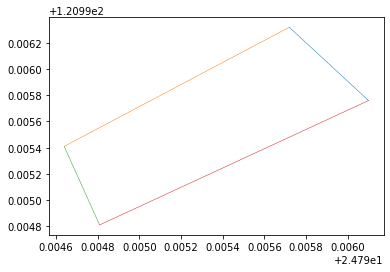

In [11]:
  plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)

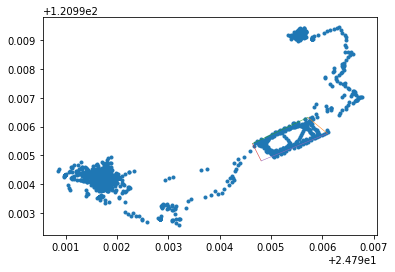

In [12]:
plt.plot(N,E,'.') + plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)

In [13]:
NODEN = []
NODEE = []
for t in range(0,sheet.max_row-2):
  if N[t] >= ND and N[t] <= NA and E[t] < EB and E[t] > EC:
#(N[t],E[t]) > (ND , EC) and
    NODEN.append(N[t])
    NODEE.append(E[t])

In [14]:
len(NODEN)

239

239

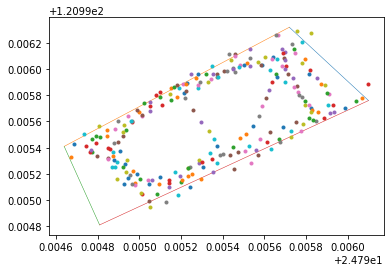

In [15]:
NUM=0
plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)
for t in range(0,sheet.max_row-2):
  if N[t] >= ND and N[t] <= NA and E[t] < EB and E[t] > EC:
    plt.plot(N[t],E[t],'.')
    NUM = NUM + 1
#(N[t],E[t]) > (ND , EC) and
NUM

In [16]:
KAB =  (NA - NB)/(EA - EB)
BAB =  NA - KAB*EA

KBD =  (NB - ND)/(EB - ED)
BBD =  NB - KBD*EB

KCA =  (NC - NA)/(EC - EA)
BCA =  NC - KCA*EC

KDC =  (ND - NC)/(ED - EC)
BDC =  ND - KDC*ED

KAB,BAB,NA,NB,EA,EB

(-0.6785714285795853,
 106.90036571527264,
 24.7961,
 24.79572,
 120.99576,
 120.99632)

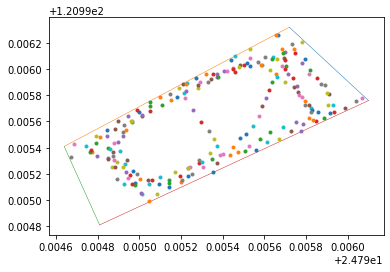

In [17]:
NODENN = []
NODEEE = []
#NUMM = 0
plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)
for t in range(0,NUM-1):
  TEMPAB = NODEE[t]*KAB + BAB
  TEMPBD = NODEE[t]*KBD + BBD
  TEMPDC = NODEE[t]*KDC + BDC
  TEMPCA = NODEE[t]*KCA + BCA
  #print(TEMPAB,TEMPBD,TEMPDC,TEMPCA,NODEE[t])
  #if (TEMPAB >= NODEE[t]) and (TEMPBD >= NODEE[t]) and (TEMPDC <= NODEE[t]) and (TEMPCA >= NODEE[t]):
  if (TEMPAB >= NODEN[t]) and (TEMPBD <= NODEN[t]) and (TEMPDC <= NODEN[t]) and (TEMPCA >= NODEN[t]):
    plt.plot(NODEN[t],NODEE[t],'.')
    #NUMM = NUMM + 1
    NODENN.append(NODEN[t])
    NODEEE.append(NODEE[t])
#(N[t],E[t]) > (ND , EC) and
#NUMM

In [18]:
NUMM = len(NODENN)
len(NODENN)

211

[60, 42, 36, 38, 35]

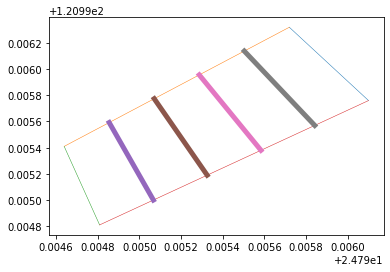

In [19]:
X=[NUMM,0,0,0,0]
XCA = (EA-EC)/5
XBD = (EB-ED)/5
#XCA,XBD
N_EC = EC
N_ED = ED
plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)
for i in range(1,5):
  #print(i)
  N_EC = N_EC + XCA
  N_ED = N_ED + XBD
  N_NC = N_EC*KCA + BCA
  N_ND = N_ED*KBD + BBD
  plt.plot([N_NC,N_ND],[N_EC,N_ED], linewidth = 5) 
  #print(N_NC , N_EC , N_ND , N_ED)
  MMM = 0
  for t in range(0,NUM-1):
    N_KDC =  (N_ND - N_NC)/(N_ED - N_EC)
    N_BDC =  N_ND - N_KDC*N_ED
    TEMPAB = NODEE[t]*KAB + BAB
    TEMPBD = NODEE[t]*KBD + BBD
    TEMPDC = NODEE[t]*N_KDC + N_BDC
    TEMPCA = NODEE[t]*KCA + BCA
    #print(TEMPAB,TEMPBD,TEMPDC,TEMPCA,NODEE[t])
    #if (TEMPAB >= NODEE[t]) and (TEMPBD >= NODEE[t]) and (TEMPDC <= NODEE[t]) and (TEMPCA >= NODEE[t]):
    if (TEMPAB >= NODEN[t]) and (TEMPBD <= NODEN[t]) and (TEMPDC <= NODEN[t]) and (TEMPCA >= NODEN[t]):
      #plt.plot(NODEN[t],NODEE[t],'.')
      MMM = MMM + 1
  
  
  X[i]= X[0] - MMM  
  X[0]= MMM
#MMM
#N_EC,N_NC,N_ED,N_ND
X

[79, 93, 39]

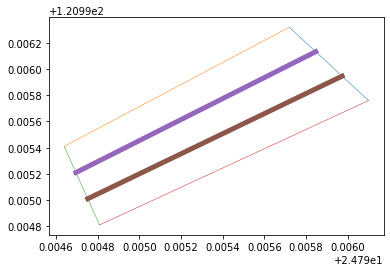

In [20]:
Y=[NUMM,0,0]
XDC = (NC-ND)/3
XAB = (NA-NB)/3
#XCA,XBD
N_NB = NB
N_ND = ND
plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)
for i in range(1,3):
  #print(i)
  N_NB = N_NB + XAB
  N_ND = N_ND + XDC
  N_EB = (N_NB - BAB)/KAB 
  N_ED = (N_ND - BDC)/KDC
  plt.plot([N_NB,N_ND],[N_EB,N_ED], linewidth = 5) 
  #print(N_NC , N_EC , N_ND , N_ED)
  MMM = 0
  for t in range(0,NUM-1):
    N_KBD =  (N_NB - N_ND)/(N_EB - N_ED)
    N_BBD =  N_ND - N_KBD*N_ED
    TEMPAB = NODEE[t]*KAB + BAB
    TEMPBD = NODEE[t]*N_KBD + N_BBD
    TEMPDC = NODEE[t]*KDC + BDC
    TEMPCA = NODEE[t]*KCA + BCA
    #print(TEMPAB,TEMPBD,TEMPDC,TEMPCA,NODEE[t])
    #if (TEMPAB >= NODEE[t]) and (TEMPBD >= NODEE[t]) and (TEMPDC <= NODEE[t]) and (TEMPCA >= NODEE[t]):
    if (TEMPAB >= NODEN[t]) and (TEMPBD <= NODEN[t]) and (TEMPDC <= NODEN[t]) and (TEMPCA >= NODEN[t]):
      #plt.plot(NODEN[t],NODEE[t],'.')
      MMM = MMM + 1
  
  
  Y[i]= Y[0] - MMM  
  Y[0]= MMM
#MMM
#N_EC,N_NC,N_ED,N_ND
Y

In [21]:
X_AV = 0
Y_AV = 0
for i in range(0,5):
  X_AV = X_AV + X[i]
X_AV = X_AV/5
for i in range(0,3):
  Y_AV = Y_AV + Y[i]
Y_AV = Y_AV/3

X_AV,Y_AV

(42.2, 70.33333333333333)

In [22]:
X_S = 0
for i in range(0,5):
  X_S = X_S + (X[i]- X_AV)*(X[i]- X_AV)
X_S = X_S/5

Y_S = 0
for i in range(0,3):
  Y_S = Y_S + (Y[i]- Y_AV )*(Y[i]- Y_AV )
Y_S = Y_S/3

X_S,Y_S

(84.96000000000001, 523.5555555555555)

In [23]:
X_D = math.sqrt(X_S)
Y_D = math.sqrt(Y_S)
X_D,Y_D

(9.21737489744233, 22.88133640230735)

In [24]:
GPS = (X_D + Y_D)/2
#GPS 平均標準差
GPS

16.04935564987484

In [25]:
if GPS<=20:
  print("均勻度高")
if GPS>20 and GPS<=40:
  print("均勻度一般")
if GPS>40 and GPS<=80:
  print("均勻度差")
if GPS>80:
  print("均勻度極差")
  

均勻度高


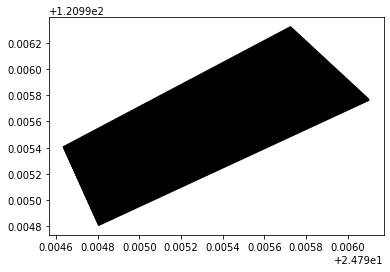

In [26]:
XDC = (NC-ND)/100
XAB = (NA-NB)/100
#XCA,XBD
N_NB = NB
N_ND = ND
plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)
for i in range(1,100):
  #print(i)
  N_NB = N_NB + XAB
  N_ND = N_ND + XDC
  N_EB = (N_NB - BAB)/KAB 
  N_ED = (N_ND - BDC)/KDC
  plt.plot([N_NB,N_ND],[N_EB,N_ED], linewidth = 3, color = "black") 

plt.savefig('square.png')

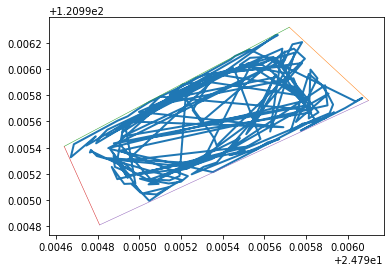

In [27]:
plt.plot(NODENN,NODEEE,linewidth = 2) + plt.plot([NA,NB],[EA,EB] , linewidth = 0.5) + plt.plot([NB,ND],[EB,ED] , linewidth = 0.5) + plt.plot([NC,ND],[EC,ED] , linewidth = 0.5) + plt.plot([NC,NA],[EC,EA] , linewidth = 0.5)
plt.savefig('fig.png')

In [28]:
#路徑覆蓋度
import cv2 
import matplotlib.image as mpimg
#img=mpimg.imread('square.png')
#plt.imshow(img)

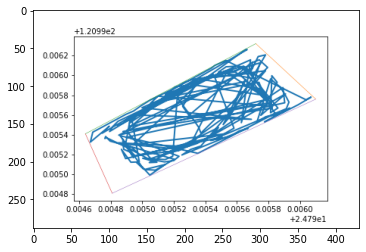

In [29]:
image = cv2.imread('square.png',0) 
image2 = cv2.imread('fig.png') 

image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()

size = image2.size/3
#type(image2),image2.shape
#image2


In [30]:
sought = np.array([255,255,255],np.uint8)
white  = np.count_nonzero(np.all(image2==sought,2))
#print(f"white: {white}")
sought = np.array([0,0,0],np.uint8)
black  = np.count_nonzero(np.all(image2==sought,2))
#print(f"black: {black}")
#顏色覆蓋率
ratio1 = ((size - white)/size)*100
ratio1

17.023533950617285

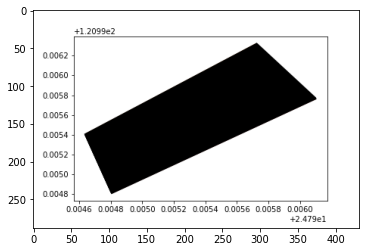

(20.864679783950617, 4.208461934156379)

In [34]:
image = cv2.imread('square.png') 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

size = image.size/3

sought = np.array([255,255,255],np.uint8)
white  = np.count_nonzero(np.all(image==sought,2))
#print(f"white: {white}")
sought = np.array([0,0,0],np.uint8)
black  = np.count_nonzero(np.all(image==sought,2))
#print(f"black: {black}")
#顏色覆蓋
other = size - white - black
ratio1_0 = (other/size)*100
#黑色的覆蓋率
ratio0 = (black/size)*100
ratio0,ratio1_0 

In [35]:
#總覆蓋度
ratio = (ratio1 - ratio1_0) /ratio0
ratio*100

61.419931430332454

In [36]:
print("GPS平均標準差 = ",GPS,"%")
if GPS<=20:
  print("均勻度高")
if GPS>20 and GPS<=40:
  print("均勻度一般")
if GPS>40 and GPS<=80:
  print("均勻度差")
if GPS>80:
  print("均勻度極差")

print("路徑總覆蓋度 = ",ratio*100,"%")

GPS平均標準差 =  16.04935564987484 %
均勻度高
路徑總覆蓋度 =  61.419931430332454 %
